In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv("iris.csv",header=None,names=['f1','f2','f3','f4','class'])

In [51]:
df.head()

,f1,f2,f3,f4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [53]:
df2 = df.loc[:, 'f1':'f4']

In [54]:
df2.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


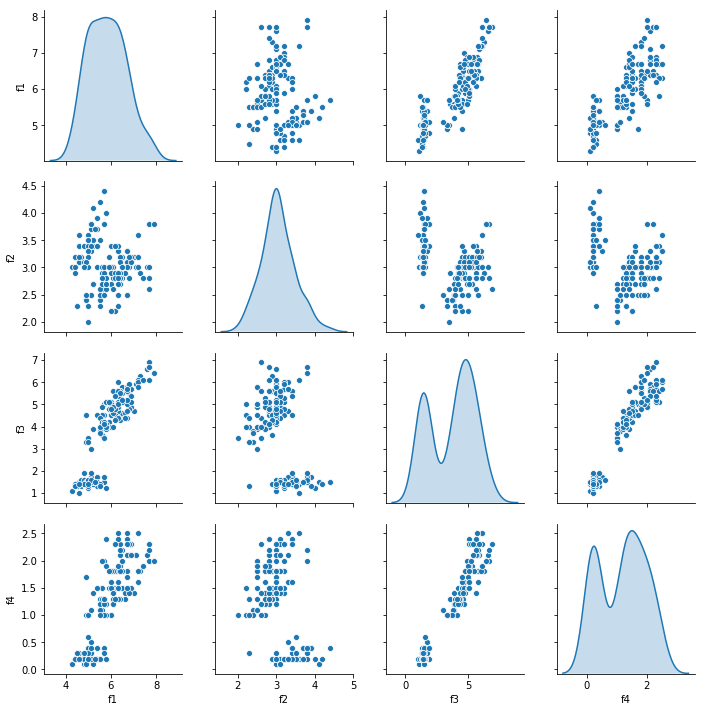

In [55]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [56]:
df_scaled = df2.apply(zscore)


In [57]:
df_scaled.head()

,f1,f2,f3,f4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [58]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.429708
4,5,91.191970
5,6,80.204334
6,7,72.409561
7,8,63.795006
8,9,54.812011
9,10,47.608553


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

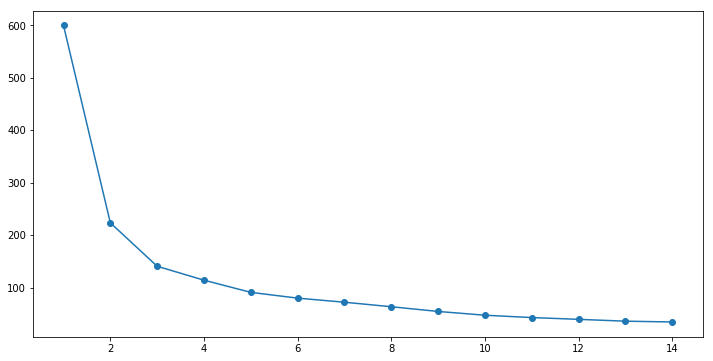

In [59]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [60]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [61]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [62]:
centroids=kmeans.cluster_centers_

In [63]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [64]:
centroid_df

,f1,f2,f3,f4
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [65]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [66]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [67]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)


In [68]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [69]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [70]:
tot_I=I0+I1+I2
print(tot_I)

140.96581663074699


In [71]:
kmeans.inertia_

140.96581663074699

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.580184463257396


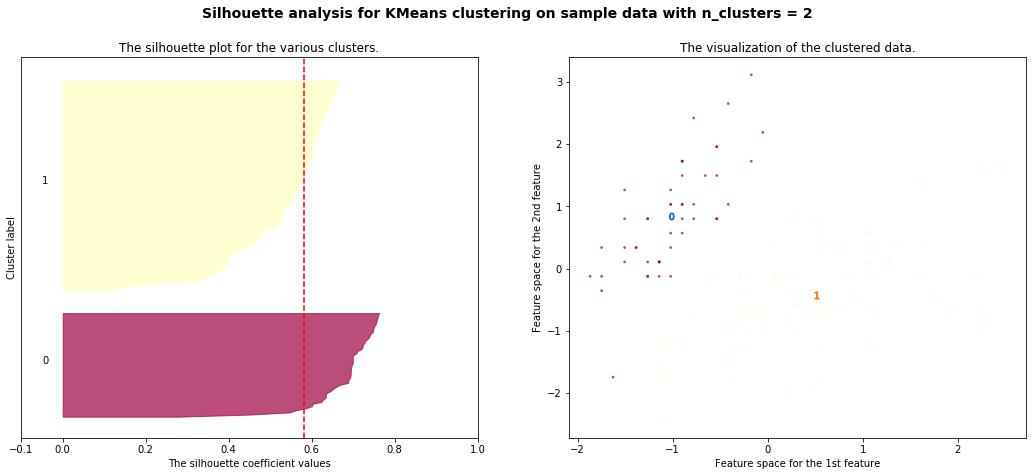

For n_clusters = 3 The average silhouette_score is : 0.46214947389312017


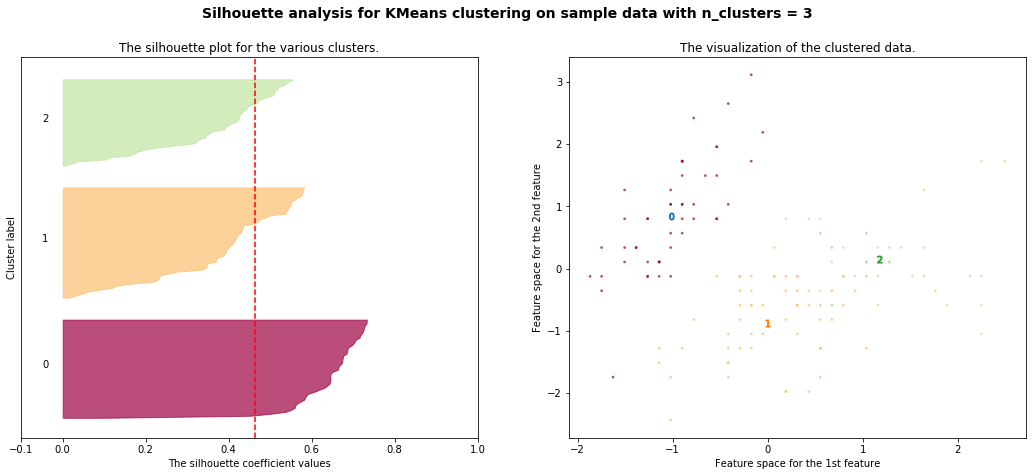

For n_clusters = 4 The average silhouette_score is : 0.38686030299599405


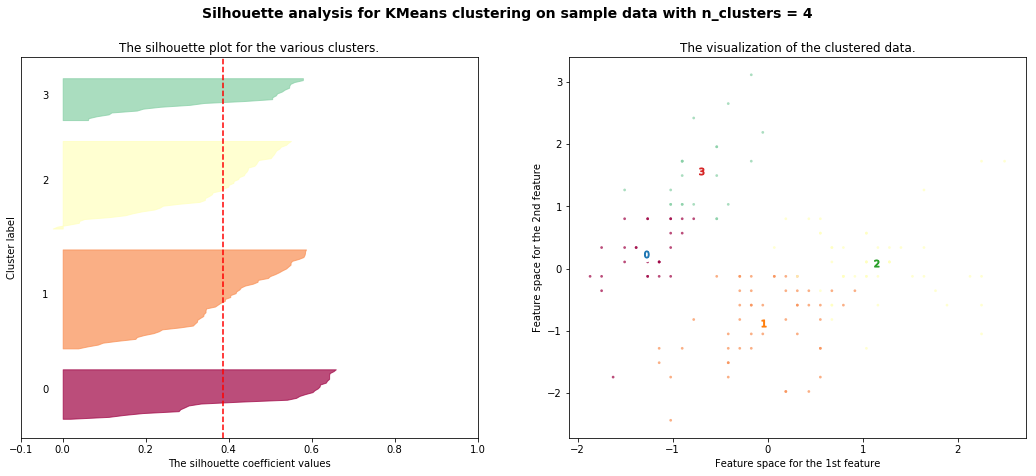

For n_clusters = 5 The average silhouette_score is : 0.34478573455929096


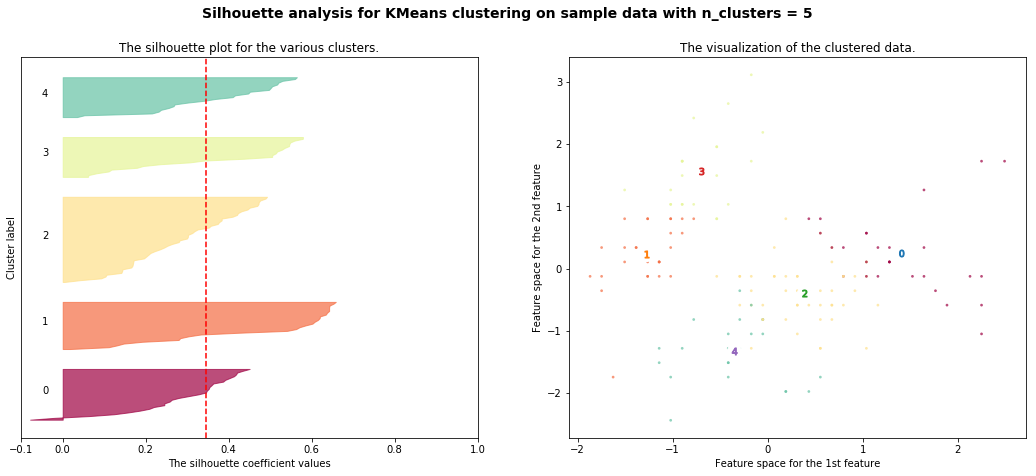

For n_clusters = 6 The average silhouette_score is : 0.3259365058730077


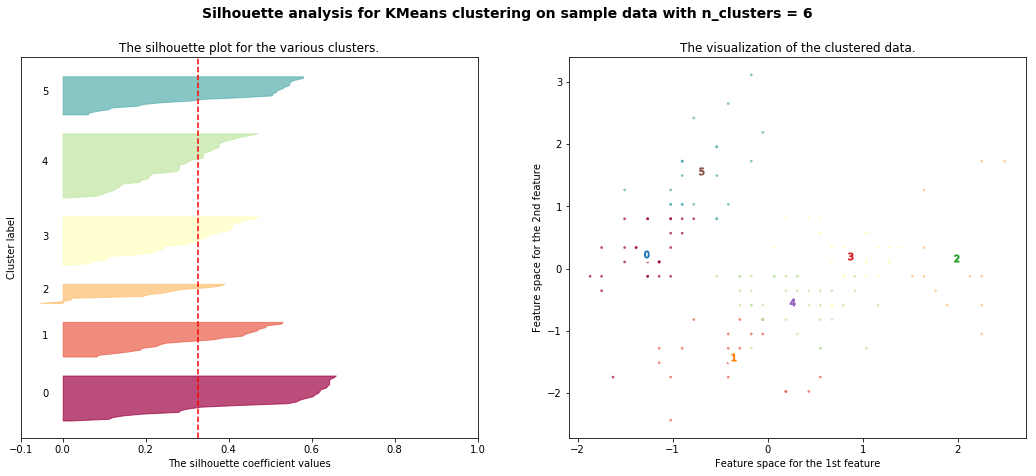

In [72]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()